In [1]:
# Importing Libraries and Loading the Data
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download Coca-Cola stock data
df = yf.download('KO', start='2010-01-01', end='2024-12-31')
print(df.head())


YF.download() has changed argument auto_adjust default to True



[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker             KO         KO         KO         KO        KO
Date                                                            
2010-01-04  17.818317  17.874546  17.774584  17.855803  13870400
2010-01-05  17.602764  17.802690  17.537164  17.758955  23172400
2010-01-06  17.596525  17.630886  17.487190  17.602772  19264600
2010-01-07  17.552784  17.609013  17.415336  17.596519  13234600
2010-01-08  17.227913  17.380980  17.102959  17.324751  28712400


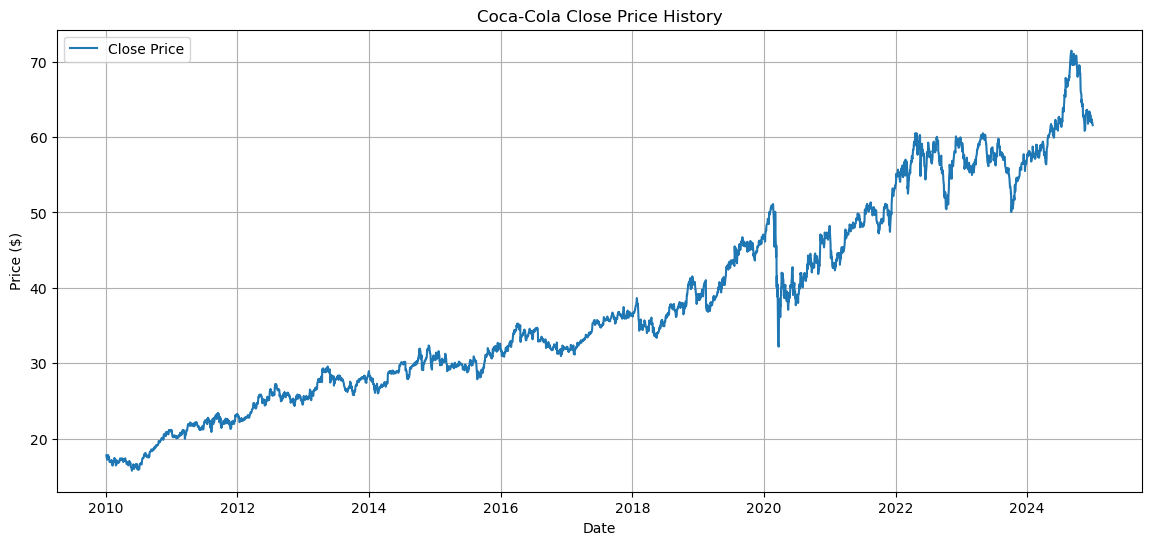

In [ ]:
# Visualizing The Data
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Coca-Cola Close Price History')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

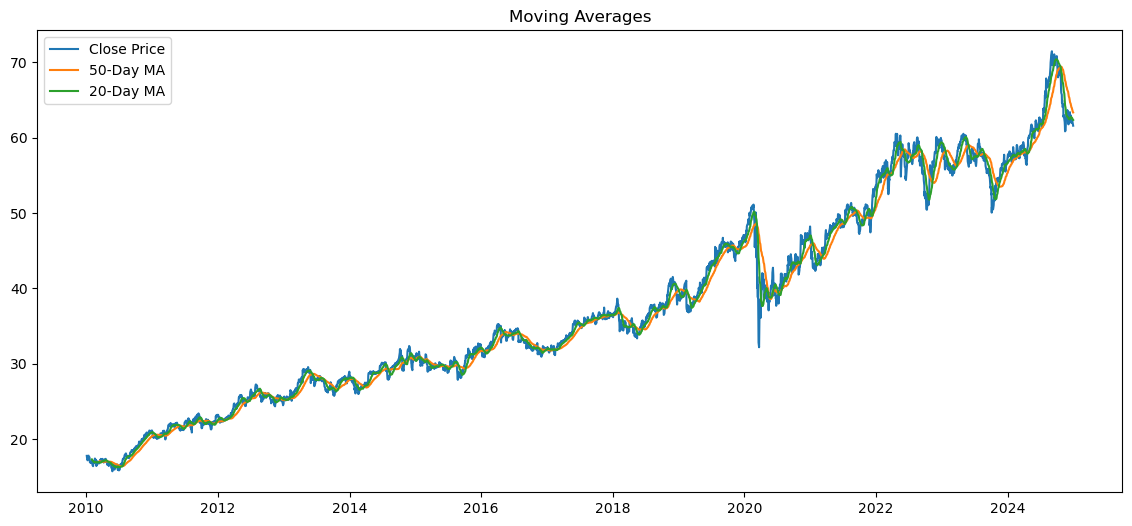

In [ ]:
# Showing the Moving Averages i.e Close Price, 50-Day Moving Average, 20-Day Moving Averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA50'], label='50-Day MA')
plt.plot(df['MA20'], label='20-Day MA')
plt.title('Moving Averages')
plt.legend()
plt.show()

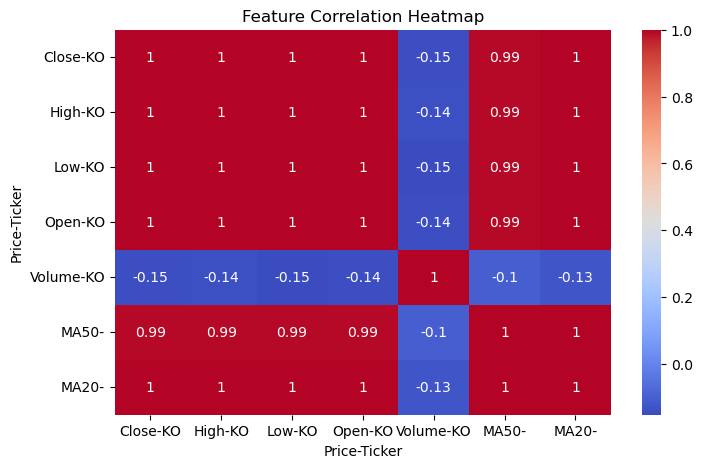

In [4]:
# Correlation HeatMap

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
# Using FOR STOCK PRICE PREDICTION

#  Preprocessing the Data
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = df[['Close']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [6]:
# installing Tensorflow
!pip install tensorflow


In [7]:
# In order to run the tensorflow we have to upgrade the numpy
!pip install --upgrade numpy


  Using cached numpy-2.2.6-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-macosx_14_0_arm64.whl (5.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
scipy 1.11.1 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.2.6 which is incompatible.


In [8]:
# Upgrading the pip and numpy tensorflow
!pip install --upgrade pip
!pip install --upgrade numpy tensorflow


  Using cached numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl (5.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 2.1.3 which is incompatible.
scipy 1.11.1 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.1.3 which is incompatible.


In [9]:
!pip install numpy==1.26.4



  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.


In [10]:
import numpy as np
print(np.__version__)


1.26.4


In [11]:
# Normalizing the data

import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))



In [15]:
# Importing Sequential, LSTM and Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [12]:
# Creating training data
X_train = []
y_train = []

for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])  # last 60 days
    y_train.append(scaled_data[i, 0])       # current day

X_train, y_train = np.array(X_train), np.array(y_train)


In [13]:
# Reshaing the X_train

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [16]:
# Training the Model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10


/Users/animesh/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0382
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.3927e-04
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.5543e-04
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.9362e-04
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.5345e-04
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.9740e-04
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.0412e-04
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 5.2257e-04
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.4948e-04
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.4841e-04


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


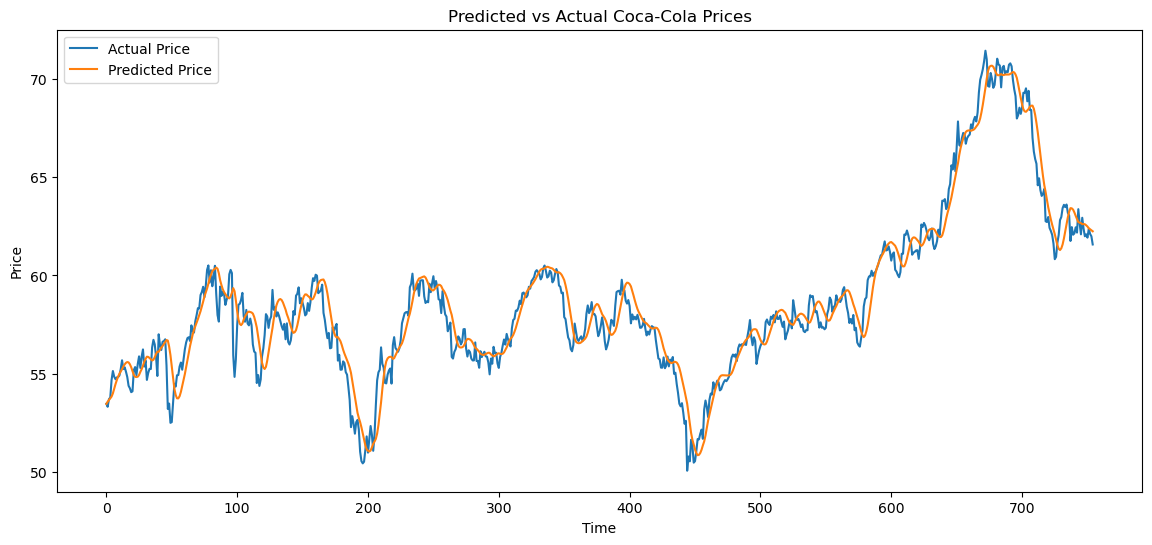

In [ ]:
# Making Prediction And Plot
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
plt.figure(figsize=(14, 6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('Predicted vs Actual Coca-Cola Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [24]:
model.save('model.h5')


In [22]:
!pip install streamlit

  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 4.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 7.3 MB/s eta 0:00:00
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 5.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1 0/10 [typing-extensions]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [streamlit]10 [streamlit]


In [25]:
# Live Updating System

import streamlit as st
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

st.title("📈 Coca-Cola Stock Price Predictor")

# Load data
df = yf.download('KO', start='2010-01-01')
st.write(df.tail())

# Preprocess
scaler = MinMaxScaler()
data = df[['Close']].values
scaled_data = scaler.fit_transform(data)
test_data = scaled_data[-(60+1):]

X_test = []
X_test.append(test_data[:60, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Load model
model = load_model('model.h5')
prediction = model.predict(X_test)
predicted_price = scaler.inverse_transform(prediction)

st.subheader("Predicted Next Day Closing Price:")
st.metric(label="Predicted Price ($)", value=round(predicted_price[0][0], 2))


2025-06-02 21:32:12.330 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 21:32:12.331 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
[*********************100%***********************]  1 of 1 completed
2025-06-02 21:32:12.937 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 21:32:12.937 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


2025-06-02 21:32:13.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 21:32:13.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 21:32:13.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 21:32:13.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [28]:
model.save("model.h5")


